In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
class ConvNet:
    def __init__(self, stride, padding, k_size):
        self.stride = stride
        self.padding = padding
        self.k_size = k_size
        
    def forward(self, image):
        self.image = image
        bw_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        image_width, image_height = bw_image.shape
        
        kernel = np.random.randn(self.k_size, self.k_size)
        kernel_width, kernel_height = kernel.shape
        
        padding = self.padding
        pad_image = np.zeros((image_width + (padding * 2), image_height + (padding * 2)))
        num_rows, num_cols = pad_image.shape
        
        pad_image[padding:num_rows - padding, padding:num_cols - padding] = bw_image
        
        output_image = np.zeros(((num_rows + 1) - kernel_width, (num_cols + 1) - kernel_height))
        
        stride = self.stride
        for row in range(0, (num_rows + 1) - kernel_width, stride):
            for col in range(0, (num_cols + 1) - kernel_height, stride):
                output_image[row][col] = np.sum(kernel * pad_image[row:row + kernel_width, col:col + kernel_height])
                
        return output_image

In [11]:
m = ConvNet(1, 2, 5)

In [12]:
image = cv2.imread("face.jpg")

In [13]:
output = m.forward(image)

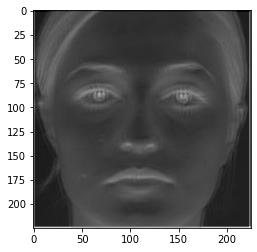

In [16]:
plt.imshow(output, cmap="gray")